In order to predict Tesla's stocks prices, we are going to use a regression algorithm. Because regression models are generally used to predict a continuous value given a set of feature which are in this case( prices low and high, date/time). We are using Linear Regression model as a very simple model, although we are aware that this algorithim will not work very well in the real world. 
Due to many reasons such as this algorithim is dealing with a single feature which is time. In the real market there are multiple features like company financials and economical indicators. 


In [1]:
#Importing all the libraries we need
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
#Reading TESLA_csv dataset:

url="https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/TSLA.csv"
df = pd.read_csv(url)
df.head(10)

df.info() # Date date tyoe is object type, we want to change it to date_time type

#df.drop(df.tail(1000).index, inplace=True) 
#When we drop a part of our data, we got a better R-score. Due to the extream rise of the price after 2020, we are getting a wrong predection for todays price for example
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2845 non-null   object 
 1   Open       2845 non-null   float64
 2   High       2845 non-null   float64
 3   Low        2845 non-null   float64
 4   Close      2845 non-null   float64
 5   Adj Close  2845 non-null   float64
 6   Volume     2845 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.7+ KB
            Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29    3.800000    5.000000    3.508000    4.778000    4.778000   
1     2010-06-30    5.158000    6.084000    4.660000    4.766000    4.766000   
2     2010-07-01    5.000000    5.184000    4.054000    4.392000    4.392000   
3     2010-07-02    4.600000    4.620000    3.742000    3.840000    3.840000   
4     2010-07-06    4.000000    4.000000    3.166000    3.222000    3.

In [3]:

# Changing the Date type column to date time, and define x, y:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:

# df_plot function to create a line plot of data with the given ploting titles, and it accepts the following parameters:
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2845 non-null   datetime64[ns]
 1   Open       2845 non-null   float64       
 2   High       2845 non-null   float64       
 3   Low        2845 non-null   float64       
 4   Close      2845 non-null   float64       
 5   Adj Close  2845 non-null   float64       
 6   Volume     2845 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 155.7 KB


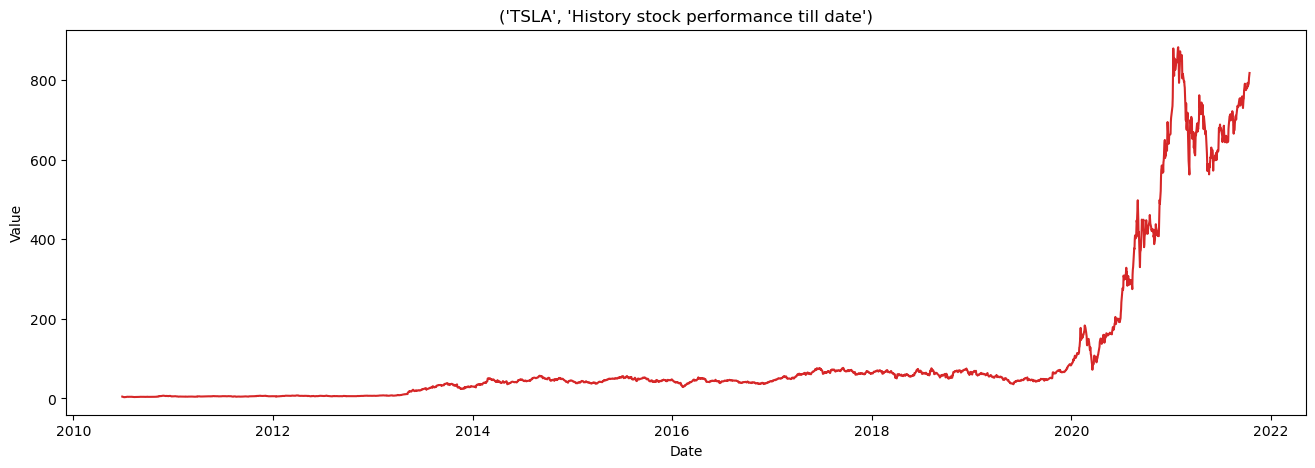

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [5]:
#Using the df_plot function, showing the results:

# x, y variables assigned to "Date" and "Close" column from TESLA dataset
x = df['Date']
y = df['Close']
df.info()

stock_name= "TSLA"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

#To understand the destribution of our dataset, we use "describe" function:
df.describe()
print(df.columns) 


In [6]:
#New column called "Date" which represents the number of days, by substructing the minmum date from each date
df['Date'] = pd.to_datetime(df['Date'])
df['Days'] = (df['Date'] - df['Date'].min()).dt.days


Now we split our data into training and testing sets using "train_test_split" function from sklearn library. 
Spliting into training set (85% of the data) and a testing set as a 15%.


In [7]:

#shuffle is 'False' to make sure that the data is not shuffled before spliting it.

train_data, test_data = train_test_split(df,test_size=0.20 , shuffle=False,random_state = 0)

# let's check if total observation makes sense, by checking the dimensions(nr of rows, columns):

print(train_data.shape)
print(test_data.shape)

(2276, 8)
(569, 8)


In [8]:
train_x = train_data['Days'].values.reshape(-1, 1)
train_y = train_data['Close'].values
test_x = test_data['Days'].values.reshape(-1, 1)
test_y = test_data['Close'].values

In [9]:
#Fitting a linear regression model to our training data, and printing the coefficients and intercept:
regression = LinearRegression()
regression.fit(train_x, train_y)


LinearRegression()

In [10]:

regression_confidence = regression.score(test_x, test_y) # R-squared value using the score method 
#result = round(regression_confidence , 20)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  -1.1806949343502717


In [11]:
#Prediction:the predicted list of data points from open, high, low, and vol are not sorted based on time or date, at this point It’s not important to sort these data point, as we will plot is based on their associated dates using scatter plot() method.

predicted=regression.predict(test_x)

 


In [12]:
#Comparing the difference between the predicted prices by our model and the actual prices:
actual_vs_predicted=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
actual_vs_predicted.head(20)

,Actual_Price,Predicted_Price
0,50.476002,71.501219
1,50.972000,71.522932
2,50.708000,71.544644
3,51.636002,71.566357
4,51.136002,71.631494
5,52.034000,71.653206
6,52.976002,71.674918
7,45.764000,71.696631
8,45.608002,71.718343
9,47.153999,71.783480


In [13]:
def enter_the_date():
    while True:
        df_str = input("Enter a date to predict the price in YYYY-MM-DD format: ")
        try:
            valid_date = datetime.strptime(df_str, "%Y-%m-%d")
            print(valid_date.date())
            return df_str
        except ValueError:
            print("The date you have entered is not valid, please try again.")

In [14]:
# Define the function to predict the stock price for:
def predict_the_price(date_string):
    date_obj = datetime.strptime(date_string, '%Y-%m-%d')
    days_since_start = (date_obj - df['Date'].min()).days
    predicted_price = regression.predict([[days_since_start]])
    return predicted_price[0]

user_date = enter_the_date()
predicted_price = predict_the_price(user_date)
print(f"TSLA Stock Predicted Price for {user_date}: ${predicted_price:.2f}")

Enter a date to predict the price in YYYY-MM-DD format: 2024-12-1
2024-12-01
TSLA Stock Predicted Price for 2024-12-1: $114.17


We notice that we are getting wrong predection..That means the model is not good enough to do the predection


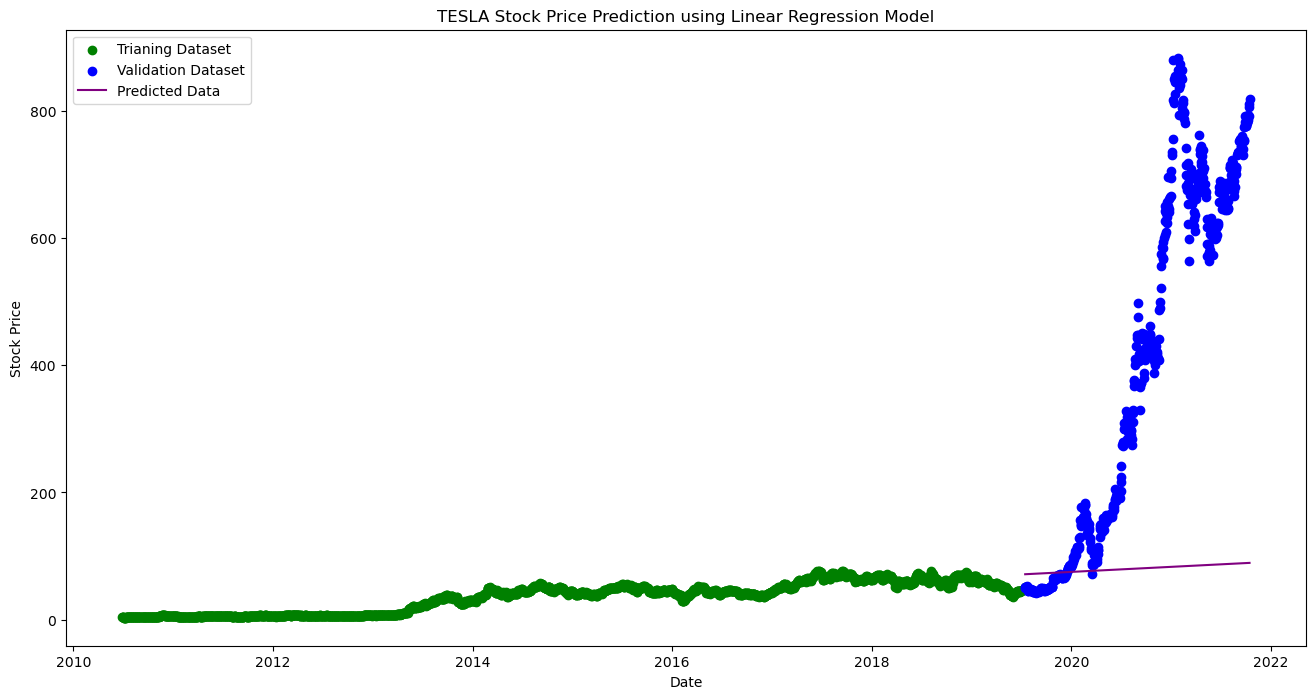

-1.1806949343502717

In [15]:
# Plot the results.
plt.figure(figsize=(16, 8))
plt.scatter(train_data['Date'], train_y, color='green', label='Trianing Dataset')
plt.scatter(test_data['Date'], test_y, color='blue', label='Validation Dataset')
plt.plot(test_data['Date'], regression.predict(test_x), color='purple', linestyle='-', label='Predicted Data')
plt.title('TESLA Stock Price Prediction using Linear Regression Model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
regression.score(test_x, test_y)


# 